In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DS_SCORES_THPT2020/clean_data.csv')

In [4]:
data

,sbd,tên,dd,mm,yy,toán,ngữ văn,khxh,khtn,lịch sử,địa lí,gdcd,sinh học,vật lí,hóa học,tiếng anh
0,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.00,-1.00,-1.00,5.2
1,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.00,-1.00,-1.00,7.0
2,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.00,-1.00,-1.00,6.0
3,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.00,5.50,6.25,5.6
4,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.50,6.75,6.25,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,2074714,Nguyễn Đình Hải Yến,10,11,2002,5.4,5.92,-1.00,4.67,-1.00,-1.00,-1.00,5.50,3.50,5.00,-1.0
74440,2074715,Nguyễn Thị Hải Yến,5,5,2002,8.6,7.00,-1.00,7.92,-1.00,-1.00,-1.00,6.75,8.25,8.75,6.2
74441,2074716,Nguyễn Trần Tiểu Yến,7,10,2002,9.2,7.50,-1.00,8.50,-1.00,-1.00,-1.00,8.25,8.75,8.50,6.2
74442,2074717,Phạm Thị Kim Yến,20,11,2002,9.0,7.00,-1.00,8.00,-1.00,-1.00,-1.00,6.75,8.00,9.25,7.0


# Tiền xử lí dữ liệu

##Missing Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74444 entries, 0 to 74443
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbd        74444 non-null  int64  
 1   tên        74444 non-null  object 
 2   dd         74444 non-null  int64  
 3   mm         74444 non-null  int64  
 4   yy         74444 non-null  int64  
 5   toán       74444 non-null  float64
 6   ngữ văn    74444 non-null  float64
 7   khxh       74444 non-null  float64
 8   khtn       74444 non-null  float64
 9   lịch sử    74444 non-null  float64
 10  địa lí     74444 non-null  float64
 11  gdcd       74444 non-null  float64
 12  sinh học   74444 non-null  float64
 13  vật lí     74444 non-null  float64
 14  hóa học    74444 non-null  float64
 15  tiếng anh  74444 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 9.1+ MB


##Convert Data to Array

In [6]:
data = np.array(data)

In [7]:
data

array([[2000001, 'Phạm Hoàng Hương Ái', 4, ..., -1.0, -1.0, 5.2],
       [2000002, 'Đặng Huỳnh Vĩnh An', 13, ..., -1.0, -1.0, 7.0],
       [2000003, 'Lâm Nguyễn Mộng Thùy An', 6, ..., -1.0, -1.0, 6.0],
       ...,
       [2074716, 'Nguyễn Trần Tiểu Yến', 7, ..., 8.75, 8.5, 6.2],
       [2074717, 'Phạm Thị Kim Yến', 20, ..., 8.0, 9.25, 7.0],
       [2074718, 'Văn Hồng Yến', 27, ..., -1.0, -1.0, -1.0]], dtype=object)

##Convert Data with fullname to lower Text

In [10]:
for d in data:
  d[1] = d[1].lower()

#Data analytics

##Số lượng các thí sinh không tham gia dự thi ở các môn

In [19]:
# loop through all stds (have 11 object)
not_take_exam = [0,0,0,0,0,0,0,0,0,0,0]
for d in data:
	for i in range(5,16):
		if d[i] == -1:
			not_take_exam[i-5] += 1

In [ ]:
# theo thứ tự: Toán, văn, KHTN, KHXH, lịch sử, địa lí, gdcd, sinh, lí, hóa, anh

In [20]:
not_take_exam

[265, 1802, 49223, 32496, 44131, 44847, 49353, 31849, 31591, 31356, 8709]

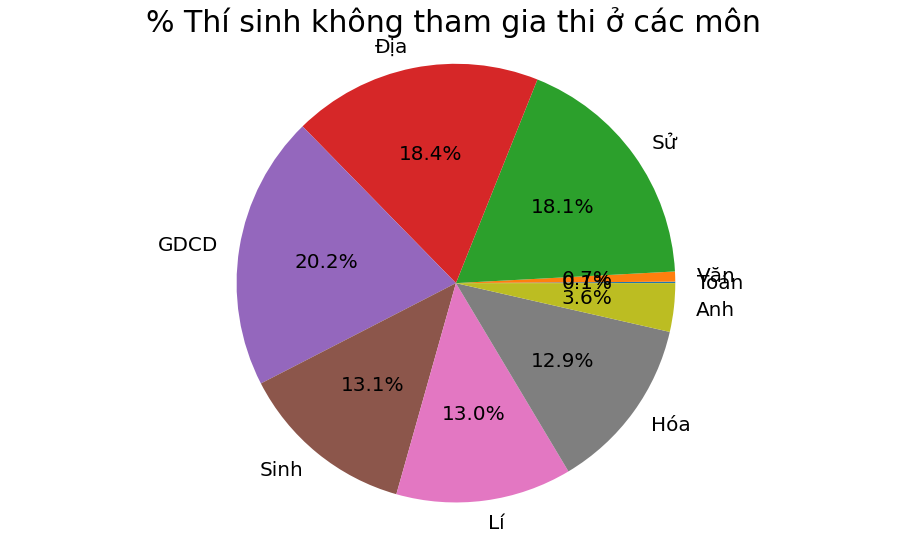

In [21]:
Tasks = [not_take_exam[0],not_take_exam[1],not_take_exam[4],not_take_exam[5],not_take_exam[6],not_take_exam[7],not_take_exam[8],not_take_exam[9],not_take_exam[10]]

fig, ax = plt.subplots(figsize =(16, 9))

my_labels = 'Toán', 'Văn', 'Sử', 'Địa', 'GDCD', 'Sinh', 'Lí', 'Hóa', 'Anh'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('% Thí sinh không tham gia thi ở các môn', fontsize = 30)
plt.axis('equal')
plt.show()

##Độ tương quan giữa số lượng các thí sinh dự thi TOÁN, VĂN, TIẾNG ANH

In [12]:
# Số thí sinh dự thi toán
count_ALL_student_join_math = 0
for i in range(len(data)):
  if data[i][5] != -1:  
    count_ALL_student_join_math += 1

# Tổng Số thí sinh dự thi VĂN
count_ALL_student_join_literature = 0
for i in range(len(data)):
  if data[i][6] != -1:  
    count_ALL_student_join_literature += 1

# Tổng Số thí sinh dự thi ANH VĂN
count_ALL_student_join_english = 0
for i in range(len(data)):
  if data[i][-1] != -1:  
    count_ALL_student_join_english += 1

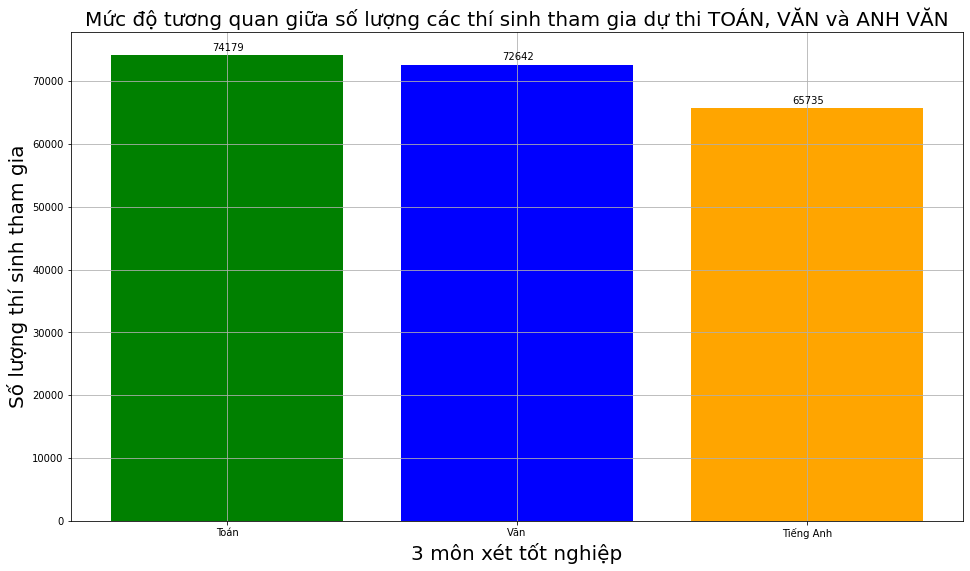

In [13]:
subject = ['Toán','Văn','Tiếng Anh']
number_studen_join = [count_ALL_student_join_math, count_ALL_student_join_literature, count_ALL_student_join_english]

New_Colors = ['green','blue','orange']
fig, ax = plt.subplots(figsize =(16, 9))

# assign your bars to a variable so their attributes can be accessed
bars = plt.bar(subject, height=number_studen_join, width=.8, color=New_Colors)

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.35, yval + 700, yval)

plt.title('Mức độ tương quan giữa số lượng các thí sinh tham gia dự thi TOÁN, VĂN và ANH VĂN', fontsize=20)
plt.xlabel('3 môn xét tốt nghiệp', fontsize=20)
plt.ylabel('Số lượng thí sinh tham gia', fontsize=20)
plt.grid(True)
plt.show()

##Phổ điểm môn Toán của các thí sinh

In [31]:
# if điểm từ 0-->1 sẽ coi là 1

score_1 = []
score_2 = []
score_3 = []
score_4 = []
score_5 = []
score_6 = []
score_7 = []
score_8 = []
score_9 = []
score_10 = []

count_score_1 = 0
count_score_2 = 0
count_score_3 = 0
count_score_4 = 0
count_score_5 = 0
count_score_6 = 0
count_score_7 = 0
count_score_8 = 0
count_score_9 = 0
count_score_10 = 0

for i in range(len(data)):
  if data[i][5] >= 0 and  data[i][5] <= 1:
    score_1.append(data[i][5])
    count_score_1 += 1
  if data[i][5] > 1 and  data[i][5] <= 2:
    score_2.append(data[i][5])
    count_score_2 += 1

  if data[i][5] > 2 and  data[i][5] <= 3:
    score_3.append(data[i][5])
    count_score_3 += 1

  if data[i][5] >3 and  data[i][5] <= 4:
    score_4.append(data[i][5])
    count_score_4 += 1

  if data[i][5] > 4 and  data[i][5] <= 5:
    score_5.append(data[i][5])
    count_score_5 += 1

  if data[i][5] > 5 and  data[i][5] <= 6:
    score_6.append(data[i][5])
    count_score_6 += 1

  if data[i][5] > 6 and  data[i][5] <= 7:
    score_7.append(data[i][5])
    count_score_7 += 1

  if data[i][5] > 7 and  data[i][5] <= 8:
    score_8.append(data[i][5])
    count_score_8 += 1

  if data[i][5] > 8 and  data[i][5] <= 9:
    score_9.append(data[i][5])
    count_score_9 += 1

  if data[i][5] >9 and  data[i][5] <= 10:
    score_10.append(data[i][5])
    count_score_10 += 1


In [32]:
def Average(lst):
    return sum(lst) / len(lst)

In [33]:
avg_score_1 = round(Average(score_1),2)
avg_score_2 = round(Average(score_2),2)
avg_score_3 = round(Average(score_3),2)
avg_score_4 = round(Average(score_4),2)
avg_score_5 = round(Average(score_5),2)
avg_score_6 = round(Average(score_6),2)
avg_score_7 = round(Average(score_7),2)
avg_score_8 = round(Average(score_8),2)
avg_score_9 = round(Average(score_9),2)
avg_score_10 = round(Average(score_10),2)

In [34]:
# Số thí sinh dự thi toán
count_ALL_student_join_math = 0
for i in range(len(data)):
  if data[i][5] != -1:  
    count_ALL_student_join_math += 1

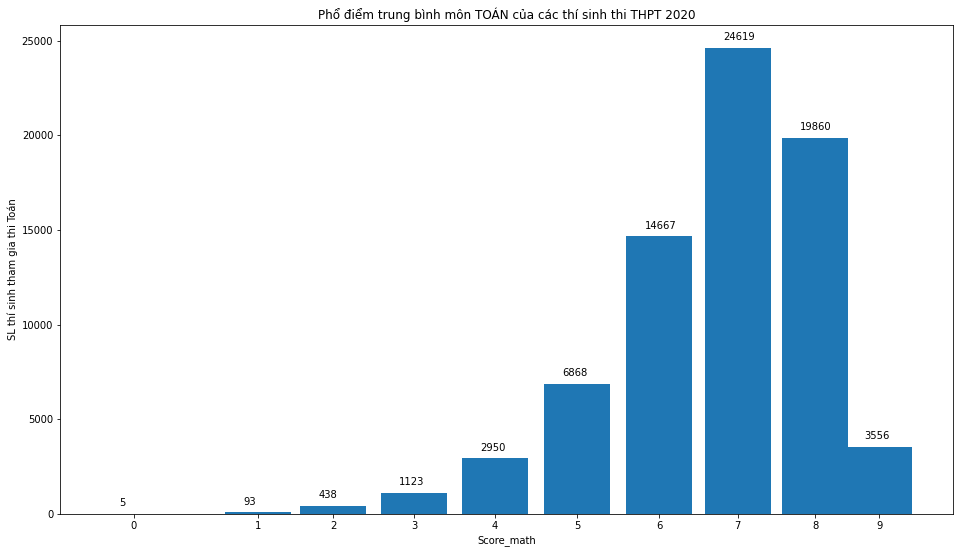

In [35]:
avg_score = [avg_score_1,avg_score_2,avg_score_3,avg_score_4,avg_score_5,avg_score_6,avg_score_7,avg_score_8,avg_score_9,avg_score_10]
count_score = [count_score_1, count_score_2,count_score_3,count_score_4,count_score_5,count_score_6,count_score_7, count_score_8,count_score_9,count_score_10]

fig, ax = plt.subplots(figsize =(16, 9))

# assign your bars to a variable so their attributes can be accessed
bars = plt.bar(avg_score, height=count_score, width=.8)

y = np.arange(11)
plt.xticks(avg_score,y)

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.22, yval + 400, yval)

plt.title('Phổ điểm trung bình môn TOÁN của các thí sinh thi THPT 2020')
plt.xlabel('Score_math')
plt.ylabel('SL thí sinh tham gia thi Toán')
plt.show()


##Phổ điểm môn văn của các thí sinh

In [36]:
# if điểm từ 0-->1 sẽ coi là 1

score_1_literature = []
score_2_literature = []
score_3_literature = []
score_4_literature = []
score_5_literature = []
score_6_literature = []
score_7_literature = []
score_8_literature = []
score_9_literature = []
score_10_literature = []

count_score_1_literature = 0
count_score_2_literature = 0
count_score_3_literature = 0
count_score_4_literature = 0
count_score_5_literature = 0
count_score_6_literature = 0
count_score_7_literature = 0
count_score_8_literature = 0
count_score_9_literature = 0
count_score_10_literature = 0

for i in range(len(data)):
  if data[i][6] >= 0 and  data[i][6] <= 1:
    score_1_literature.append(data[i][6])
    count_score_1_literature += 1
  if data[i][6] > 1 and  data[i][6] <= 2:
    score_2_literature.append(data[i][6])
    count_score_2_literature += 1

  if data[i][6] > 2 and  data[i][6] <= 3:
    score_3_literature.append(data[i][6])
    count_score_3_literature += 1

  if data[i][6] >3 and  data[i][6] <= 4:
    score_4_literature.append(data[i][6])
    count_score_4_literature += 1

  if data[i][6] > 4 and  data[i][6] <= 5:
    score_5_literature.append(data[i][6])
    count_score_5_literature += 1

  if data[i][6] > 5 and  data[i][6] <= 6:
    score_6_literature.append(data[i][6])
    count_score_6_literature += 1

  if data[i][6] > 6 and  data[i][6] <= 7:
    score_7_literature.append(data[i][6])
    count_score_7_literature += 1

  if data[i][6] > 7 and  data[i][6] <= 8:
    score_8_literature.append(data[i][6])
    count_score_8_literature += 1

  if data[i][6] > 8 and  data[i][6] <= 9:
    score_9_literature.append(data[i][6])
    count_score_9_literature += 1

  if data[i][6] >9 and  data[i][6] <= 10:
    score_10_literature.append(data[i][6])
    count_score_10_literature += 1


In [37]:
avg_score_1_literature = round(Average(score_1_literature),2)
avg_score_2_literature = round(Average(score_2_literature),2)
avg_score_3_literature = round(Average(score_3_literature),2)
avg_score_4_literature = round(Average(score_4_literature),2)
avg_score_5_literature = round(Average(score_5_literature),2)
avg_score_6_literature = round(Average(score_6_literature),2)
avg_score_7_literature = round(Average(score_7_literature),2)
avg_score_8_literature = round(Average(score_8_literature),2)
avg_score_9_literature = round(Average(score_9_literature),2)
avg_score_10_literature = round(Average(score_10_literature),2)

In [38]:
# Tổng Số thí sinh dự thi VĂN
count_ALL_student_join_literature = 0
for i in range(len(data)):
  if data[i][6] != -1:  
    count_ALL_student_join_literature += 1

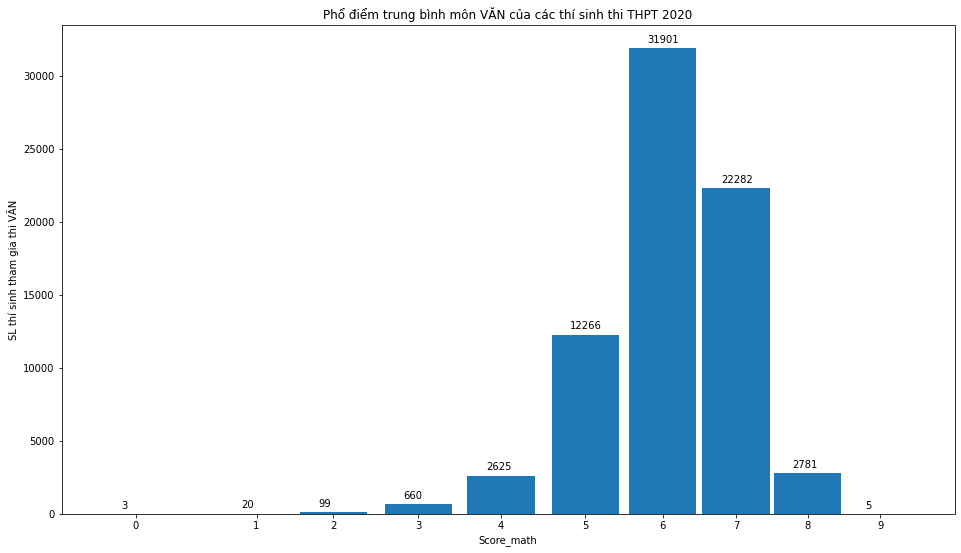

In [39]:
avg_score_literature = [avg_score_1_literature,avg_score_2_literature,avg_score_3_literature,avg_score_4_literature,avg_score_5_literature,avg_score_6_literature,avg_score_7_literature,avg_score_8_literature,avg_score_9_literature,avg_score_10_literature]
count_score_literature = [count_score_1_literature, count_score_2_literature,count_score_3_literature,count_score_4_literature,count_score_5_literature,count_score_6_literature,count_score_7_literature, count_score_8_literature,count_score_9_literature,count_score_10_literature]

fig, ax = plt.subplots(figsize =(16, 9))

# assign your bars to a variable so their attributes can be accessed
bars = plt.bar(avg_score_literature, height=count_score_literature, width=.8)

y = np.arange(11)
plt.xticks(avg_score_literature,y)

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.22, yval + 400, yval)

plt.title('Phổ điểm trung bình môn VĂN của các thí sinh thi THPT 2020')
plt.xlabel('Score_math')
plt.ylabel('SL thí sinh tham gia thi VĂN')
plt.show()


##Phổ điểm môn Tiếng Anh của các thí sinh

In [40]:
# if điểm từ 0-->1 sẽ coi là 1

score_1_english = []
score_2_english = []
score_3_english = []
score_4_english = []
score_5_english = []
score_6_english = []
score_7_english = []
score_8_english = []
score_9_english = []
score_10_english = []

count_score_1_english = 0
count_score_2_english = 0
count_score_3_english = 0
count_score_4_english = 0
count_score_5_english = 0
count_score_6_english = 0
count_score_7_english = 0
count_score_8_english = 0
count_score_9_english = 0
count_score_10_english = 0

for i in range(len(data)):
  if data[i][-1] >= 0 and  data[i][-1] <= 1:
    score_1_english.append(data[i][-1])
    count_score_1_english += 1
  if data[i][-1] > 1 and  data[i][-1] <= 2:
    score_2_english.append(data[i][-1])
    count_score_2_english += 1

  if data[i][-1] > 2 and  data[i][-1] <= 3:
    score_3_english.append(data[i][-1])
    count_score_3_english += 1

  if data[i][-1] >3 and  data[i][-1] <= 4:
    score_4_english.append(data[i][-1])
    count_score_4_english += 1

  if data[i][-1] > 4 and  data[i][-1] <= 5:
    score_5_english.append(data[i][-1])
    count_score_5_english += 1

  if data[i][-1] > 5 and  data[i][-1] <= 6:
    score_6_english.append(data[i][-1])
    count_score_6_english += 1

  if data[i][-1] > 6 and  data[i][-1] <= 7:
    score_7_english.append(data[i][-1])
    count_score_7_english += 1

  if data[i][-1] > 7 and  data[i][-1] <= 8:
    score_8_english.append(data[i][-1])
    count_score_8_english += 1

  if data[i][-1] > 8 and  data[i][-1] <= 9:
    score_9_english.append(data[i][-1])
    count_score_9_english += 1

  if data[i][-1] >9 and  data[i][-1] <= 10:
    score_10_english.append(data[i][-1])
    count_score_10_english += 1


In [41]:
# Tổng Số thí sinh dự thi ANH VĂN
count_ALL_student_join_english = 0
for i in range(len(data)):
  if data[i][-1] != -1:  
    count_ALL_student_join_english += 1

In [42]:
avg_score_1_english = round(Average(score_1_english),2)
avg_score_2_english = round(Average(score_2_english),2)
avg_score_3_english = round(Average(score_3_english),2)
avg_score_4_english = round(Average(score_4_english),2)
avg_score_5_english = round(Average(score_5_english),2)
avg_score_6_english = round(Average(score_6_english),2)
avg_score_7_english = round(Average(score_7_english),2)
avg_score_8_english = round(Average(score_8_english),2)
avg_score_9_english = round(Average(score_9_english),2)
avg_score_10_english = round(Average(score_10_english),2)

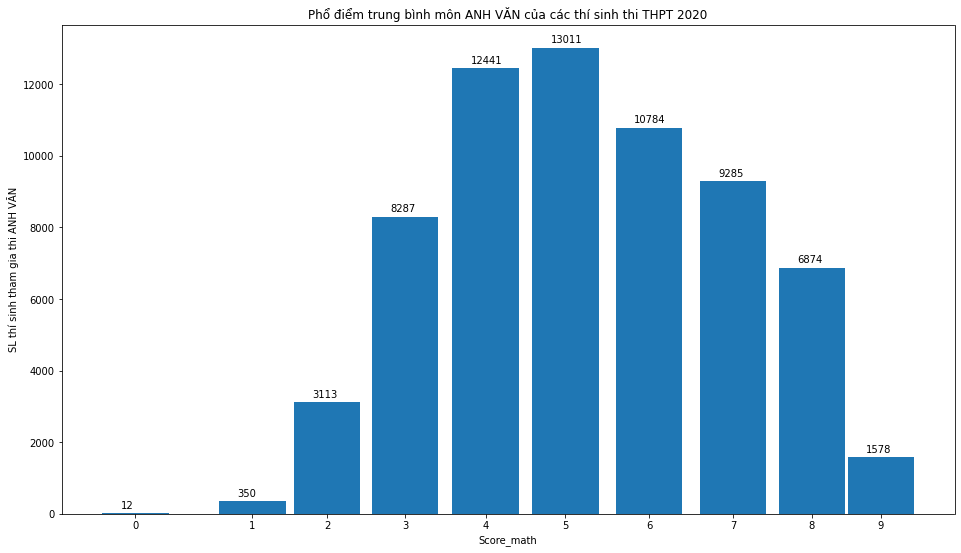

In [45]:
avg_score_english = [avg_score_1_english,avg_score_2_english,avg_score_3_english,avg_score_4_english,avg_score_5_english,avg_score_6_english,avg_score_7_english,avg_score_8_english,avg_score_9_english,avg_score_10_english]
count_score_english = [count_score_1_english, count_score_2_english,count_score_3_english,count_score_4_english,count_score_5_english,count_score_6_english,count_score_7_english, count_score_8_english,count_score_9_english,count_score_10_english]

fig, ax = plt.subplots(figsize =(16, 9))

# assign your bars to a variable so their attributes can be accessed
bars = plt.bar(avg_score_english, height=count_score_english, width=.8)

y = np.arange(11)
plt.xticks(avg_score_english,y)
# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.22, yval + 150, yval)

plt.title('Phổ điểm trung bình môn ANH VĂN của các thí sinh thi THPT 2020')
plt.xlabel('Score_math')
plt.ylabel('SL thí sinh tham gia thi ANH VĂN')
plt.show()


##Độ tương quan của các thí sinh dự thi nhóm môn KHTN vs KHXH

In [14]:
# Đếm số lượng các thí sinh dự thi KHXH
count_std_KHXH = 0
list_score_KHXH =[]
for i in range(len(data)):
  if data[i][7] != -1:
    count_std_KHXH += 1
    list_score_KHXH.append(data[i][7])

In [15]:
# Đếm số lượng các thí sinh dự thi KHTN
count_std_KHTN = 0
list_score_KHTN =[]
for i in range(len(data)):
  if data[i][8] != -1:
    count_std_KHTN += 1
    list_score_KHTN.append(data[i][8])

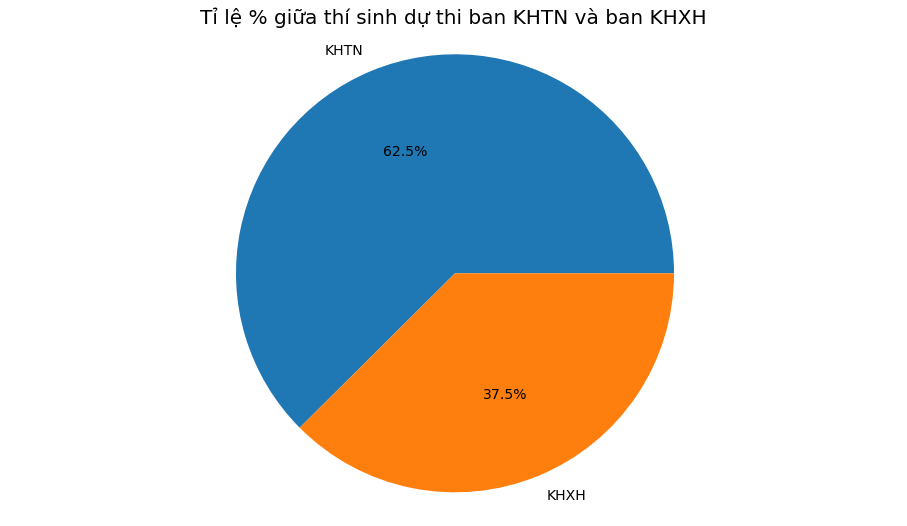

In [18]:
SL_std = [count_std_KHTN, count_std_KHXH]
my_labels = 'KHTN','KHXH'

fig, ax = plt.subplots(figsize =(16, 9))

plt.pie(SL_std,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Tỉ lệ % giữa thí sinh dự thi ban KHTN và ban KHXH',fontsize=20)
plt.axis('equal')
plt.show()

##Số lượng các môn học mà thí sinh đăng ký dự thi

In [22]:
# number of student who took 0,1,2,....11 subject
# Số học sinh thi các môn 0,1,2,3,....11 môn trong đó 0: học sinh chẳng thi môn nào
num_of_exam_taken = [0,0,0,0,0,0,0,0,0,0,0,0]
everange = [0,0,0,0,0,0,0,0,0,0,0,0]
for d in data:
	count = 0
	for i in range(11):
		if d[i+5] != -1:
			count += 1
	num_of_exam_taken[count] += 1

print(num_of_exam_taken)

[0, 80, 122, 2598, 4334, 318, 2730, 64261, 0, 0, 0, 1]


####NOTE: có 1 thí sinh đăng ký thi cả 11 môn học 

In [23]:
# có một thí sinh thi toàn bộ các môn (11 môn), xem đấy là "vị cao nhân đắc đạo nào"?
# => Trần Ngọc Minh Châu
num_of_exam_taken = [0,0,0,0,0,0,0,0,0,0,0,0]
for d in data:
  count = 0
  for i in range(11):
    if d[i+5] != -1:
      count+= 1
    if count == 11:
      print(d)
    num_of_exam_taken[count] += 1


[2050326 'trần ngọc minh châu' 28 4 2001 6.0 7.0 7.08 0.0 5.5 7.75 8.0 0.0
 0.0 0.0 5.6]


## Tính điểm trung bình theo số lượng các môn mà các thí sinh đã đăng ký

In [24]:
num_of_exam_taken = [0,0,0,0,0,0,0,0,0,0,0,0]
averange = [0,0,0,0,0,0,0,0,0,0,0,0]

for d in data:
  count = 0
  total = 0
  for i in range(11):
    if d[i+5] != -1:
      total += d[i+5]
      count += 1
  num_of_exam_taken[count] += 1
  # ví dụ thí sinh thi 3 môn mỗi môn là 9 điểm thì TB là 27/3 và cái averange này đang là tổng điểm TB
  averange[count] += total/count

for i in range(12):
  if num_of_exam_taken[i] != 0:
    averange[i] = round(averange[i]/num_of_exam_taken[i],2)

<function matplotlib.pyplot.show>

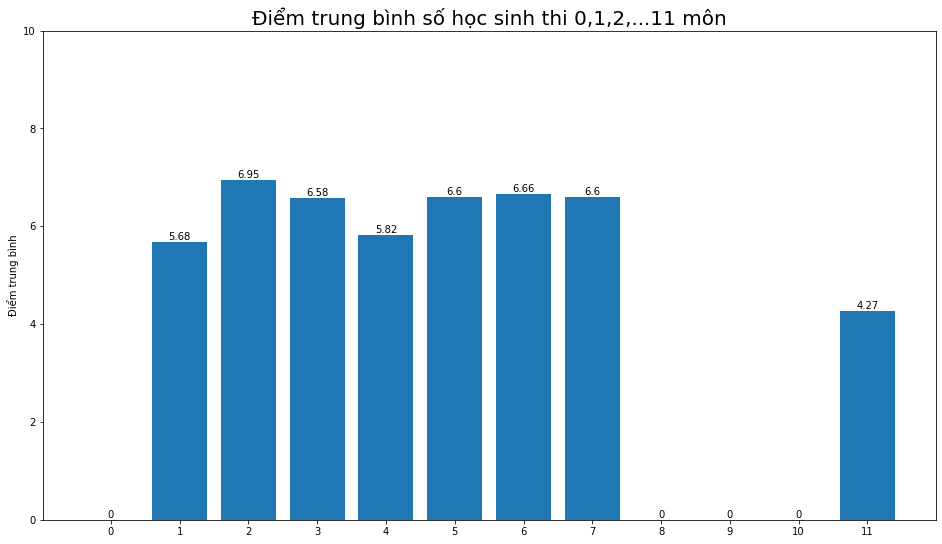

In [26]:
x = np.arange(12)
y = np.arange(12)

fig, axis = plt.subplots(figsize =(16, 9))
plt.bar(x, averange)

# set limit
axis.set_ylim(0,10)

# label for colum X
plt.xticks(x, y)

axis.set_ylabel("Điểm trung bình")

rects = axis.patches

labels = averange
for rect, label in zip(rects, labels):
  height = rect.get_height()
  axis.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')

plt.title("Điểm trung bình số học sinh thi 0,1,2,...11 môn", fontsize=20)
plt.show


##Sự tương quan của độ tuổi và điểm thi

In [27]:
# Lấy ra tổng số học sinh của mỗi nhóm tuổi
# 2003, 2002, 2001, ... , <=1993
# 17, 18, 19, ... , 26, >=27

CURRENT_YEAR = 2020

# Độ tuổi của học sinh trong mỗi nhóm
num_of_std_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]

# Điểm trung bình của học sinh trong mỗi nhóm
averange_of_std_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]

for d in data:
  age = CURRENT_YEAR - d[4]
  if age >27:
    age = 27
  num_of_std_per_age_group[age - 17] += 1

  sum_score = 0 # Tổng điểm
  count_score = 0 # Số môn thi
  for i in range(11):
    if d[i+5] != -1:
      count_score += 1
      sum_score += d[i+5]

  averange = sum_score/count_score
  averange_of_std_per_age_group[age -17] += averange


In [28]:
# Tính trung bình
for i in range(len(averange_of_std_per_age_group)):
  averange_of_std_per_age_group[i] = averange_of_std_per_age_group[i]/num_of_std_per_age_group[i]

# scale cái giá trị của averange_of_std_per_age_group * 7000 để vẽ cái biểu đồ đường cho nó trực quan
for i in range(len(averange_of_std_per_age_group)):
  averange_of_std_per_age_group[i] = averange_of_std_per_age_group[i] * 7000

<function matplotlib.pyplot.show>

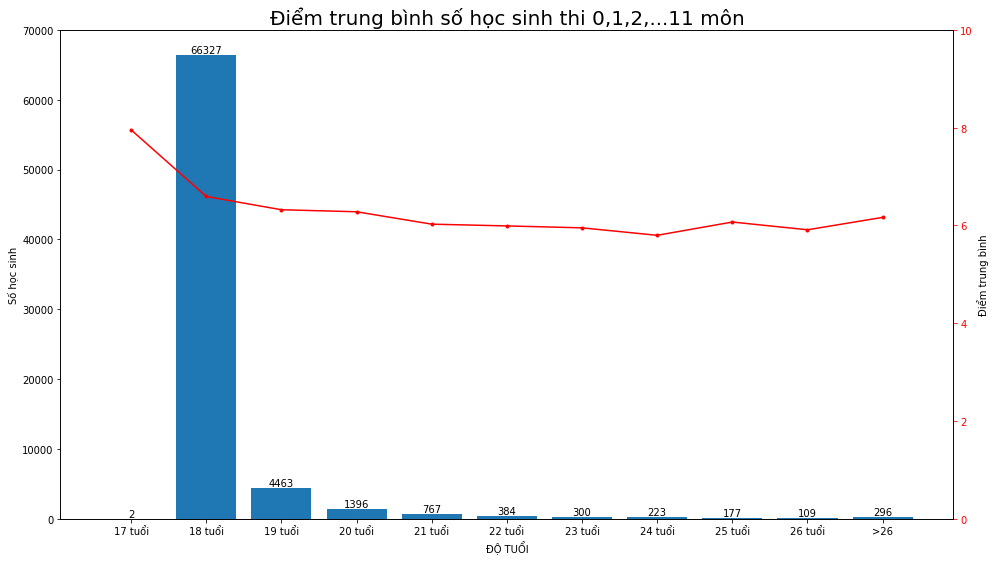

In [30]:
# Vẽ biểu đồ

x = np.arange(11)
y = np.arange(11)

age_label = ['17 tuổi', '18 tuổi','19 tuổi','20 tuổi','21 tuổi','22 tuổi','23 tuổi','24 tuổi','25 tuổi','26 tuổi','>26']

fig, axis = plt.subplots(figsize =(16, 9))
plt.bar(x, num_of_std_per_age_group)
plt.plot(x, averange_of_std_per_age_group, color='red',marker ='.')

# set limit
axis.set_ylim(0,70000)

# label for column x
plt.xticks(x, age_label)

# plt.xticks(x, y)
# label for colum X
axis.set_xlabel("ĐỘ TUỔI")
axis.set_ylabel("Số học sinh")

# right side ticks
ax2 = axis.twinx()
ax2.tick_params('y', colors = 'r')
ax2.set_ylabel("Điểm trung bình")
ax2.set_ylim(0,10)

rects = axis.patches

labels = num_of_std_per_age_group
for rect, label in zip(rects, labels):
  height = rect.get_height()
  axis.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')

plt.title("Điểm trung bình số học sinh thi 0,1,2,...11 môn", fontsize=20)
plt.show
